#Female-birth Analysis


# Install the Facebook Prophet

In [1]:
#Installing prophet
#%%capture
!pip install prophet

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet

  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/88/d6/ebc199ba1fd99719c8680b3fb90663aa4888871364c69bbf9629148b9724/prophet-1.1.4-py3-none-win_amd64.whl.metadata
  Using cached prophet-1.1.4-py3-none-win_amd64.whl.metadata (3.7 kB)
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/e8/e2/2ddc273e726680a3c816f9a05c6726d57d61820fa7ab4753ed282d0a8bbe/cmdstanpy-1.2.0-py3-none-any.whl.metadata
  Using cached cmdstanpy-1.2.0-py3-none-any.whl.metadata (3.9 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Obtaining dependency information for holidays>=0.25 from https://files.pythonhosted.org/packages/2b/21/12a180f7dc75758d466ff1eeaef894504320d9af4fd48d50080129f5538d/holidays-0.34-py3-none-any.whl.metadata
  Using cached holidays-0.34-py3-none-any.whl.metadata (17 kB)
Using cached prophet-1.1.4-py3-none-win_amd64.whl (12.9 MB)
Using cached cmdstanpy-1.2.0-py3-none-any.whl (93 kB)
Us

In [2]:
df = pd.read_csv('daily-total-female-births-CA.csv')
display(df.head())
display(df.tail())

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


,date,births
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55
364,1959-12-31,50


<Axes: >

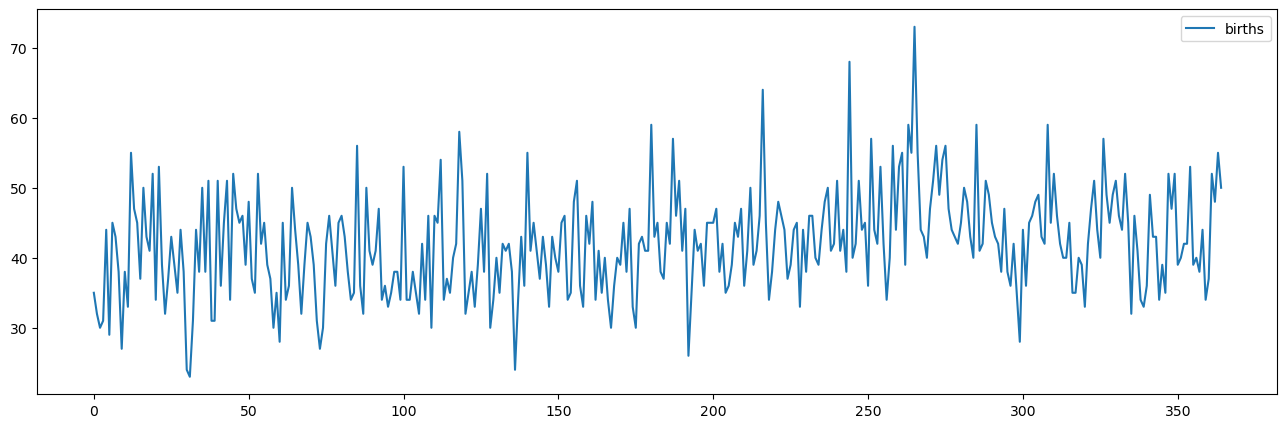

In [3]:
#Plotting the line chart
df.plot(figsize=(16,5))

In [4]:
#Renaming the columns acc to the libaray req

df.columns = ['ds','y']
df.head()

,ds,y
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [5]:
#converting the ds column into date time format

df['ds'] = pd.to_datetime(df['ds'])

In [6]:
#to have a look at all the functions available inside the prophet library

dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components'

In [7]:
# Initialize the Model

model=Prophet()

In [8]:
#Dropping the nulls if any

df.dropna(axis=0,inplace=True)

In [9]:
display(df)

,ds,y
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


In [10]:
#Fitting the model
model.fit(df)

14:34:44 - cmdstanpy - INFO - Chain [1] start processing
14:34:44 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
df.tail()

,ds,y
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55
364,1959-12-31,50


In [12]:
### Create future dates of 365 days

future_dates=model.make_future_dataframe(periods=365)

In [13]:
display(future_dates)

,ds
0,1959-01-01
1,1959-01-02
2,1959-01-03
3,1959-01-04
4,1959-01-05
...,...
725,1960-12-26
726,1960-12-27
727,1960-12-28
728,1960-12-29


In [14]:
#Making the Prediction

prediction=model.predict(future_dates)

In [15]:
# Displaying the Prediction
display(prediction)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1959-01-01,38.144325,30.751964,48.399956,38.144325,38.144325,1.107330,1.107330,1.107330,1.107330,1.107330,1.107330,0.0,0.0,0.0,39.251655
1,1959-01-02,38.166785,29.542440,46.830590,38.166785,38.166785,0.026515,0.026515,0.026515,0.026515,0.026515,0.026515,0.0,0.0,0.0,38.193300
2,1959-01-03,38.189244,29.181357,45.663363,38.189244,38.189244,-0.760488,-0.760488,-0.760488,-0.760488,-0.760488,-0.760488,0.0,0.0,0.0,37.428756
3,1959-01-04,38.211704,26.380478,44.647129,38.211704,38.211704,-3.085682,-3.085682,-3.085682,-3.085682,-3.085682,-3.085682,0.0,0.0,0.0,35.126022
4,1959-01-05,38.234163,29.175115,45.679161,38.234163,38.234163,-0.853687,-0.853687,-0.853687,-0.853687,-0.853687,-0.853687,0.0,0.0,0.0,37.380476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1960-12-26,46.837118,37.185505,55.145028,45.705485,48.034079,-0.853687,-0.853687,-0.853687,-0.853687,-0.853687,-0.853687,0.0,0.0,0.0,45.983431
726,1960-12-27,46.843239,40.475195,57.846940,45.707829,48.046178,1.743759,1.743759,1.743759,1.743759,1.743759,1.743759,0.0,0.0,0.0,48.586998
727,1960-12-28,46.849359,40.965686,57.255440,45.710505,48.058278,1.822252,1.822252,1.822252,1.822252,1.822252,1.822252,0.0,0.0,0.0,48.671611
728,1960-12-29,46.855480,39.388990,56.812781,45.712103,48.070377,1.107330,1.107330,1.107330,1.107330,1.107330,1.107330,0.0,0.0,0.0,47.962810


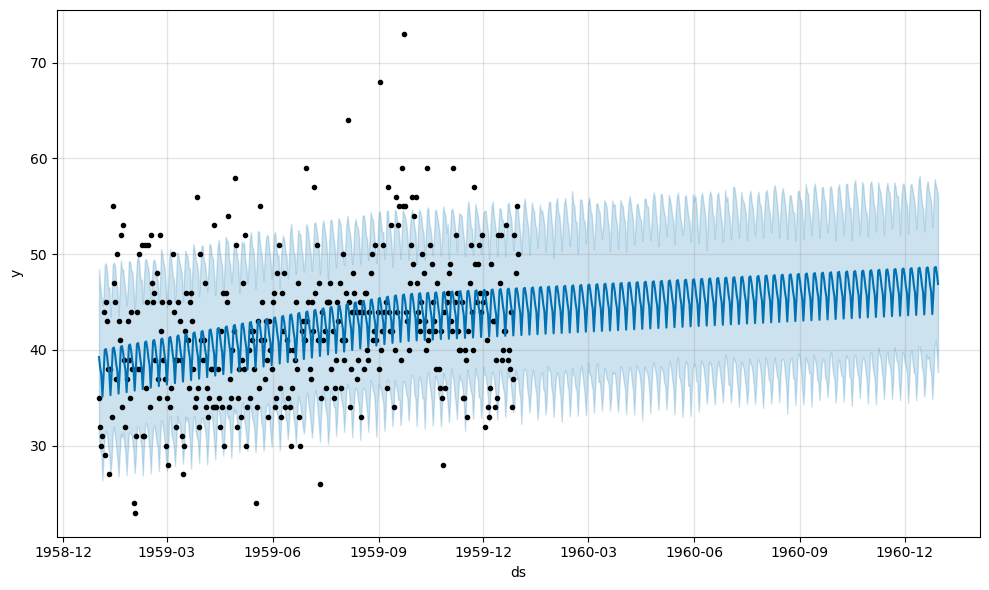

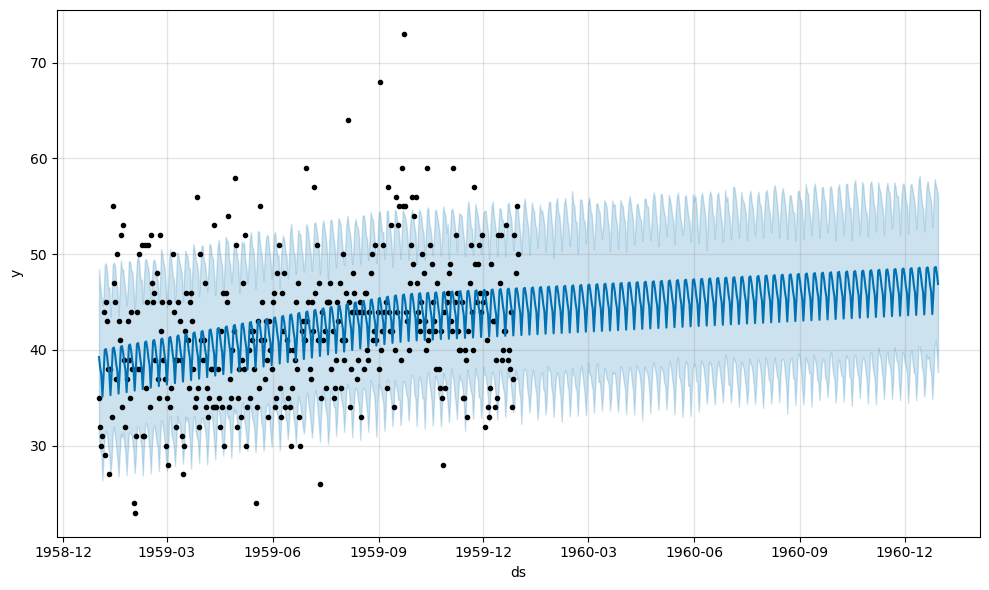

In [16]:
### plot the predicted projection
model.plot(prediction)

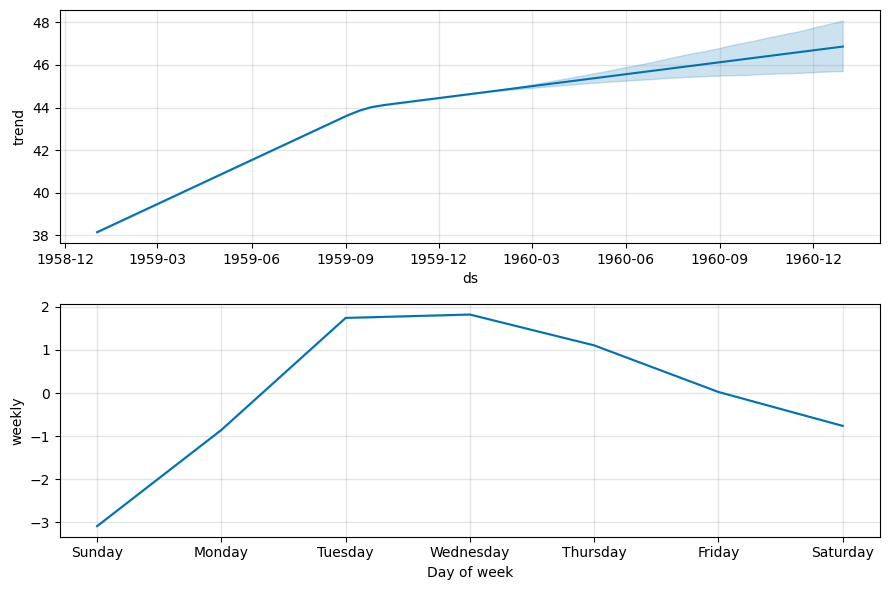

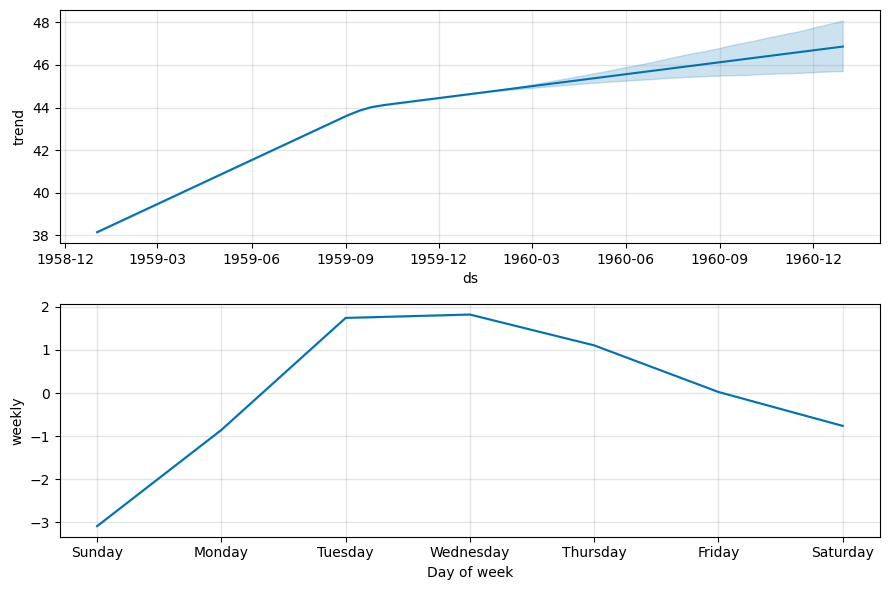

In [17]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)